In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [8]:
azure_df = pd.read_csv("../data/raw/azure_usage.csv")
external_df = pd.read_csv("../data/raw/external_factors.csv")

convert date columns to datetime

In [9]:
azure_df['date'] = pd.to_datetime(azure_df['date'])
external_df['date'] = pd.to_datetime(external_df['date'])

Azure Usage Data Info

In [10]:
print("Azure Usage Data")
print(azure_df.info())
print(azure_df.head())

Azure Usage Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1080 non-null   datetime64[ns]
 1   region         1080 non-null   object        
 2   resource_type  1080 non-null   object        
 3   usage_cpu      1080 non-null   int64         
 4   usage_storage  1080 non-null   int64         
 5   users_active   1080 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 50.8+ KB
None
        date   region resource_type  usage_cpu  usage_storage  users_active
0 2023-01-01  East US            VM         88           1959           470
1 2023-01-01  East US       Storage         92           1595           388
2 2023-01-01  East US     Container         70            621           414
3 2023-01-01  West US            VM         60           1982           287
4 2023-01-01  

External Factors Data Info

In [11]:
print("External Factors Data")
print(external_df.info())
print(external_df.head())

External Factors Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 90 non-null     datetime64[ns]
 1   economic_index       90 non-null     float64       
 2   cloud_market_demand  90 non-null     float64       
 3   holiday              90 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.9 KB
None
        date  economic_index  cloud_market_demand  holiday
0 2023-01-01          104.97                 0.99        1
1 2023-01-02          106.48                 1.15        0
2 2023-01-03           97.66                 0.98        0
3 2023-01-04          115.79                 1.08        0
4 2023-01-05           95.31                 1.05        0


Missing Values

In [12]:
print("Missing Values - Azure\n",azure_df.isnull().sum())
print("Missing Values - External\n",external_df.isnull().sum())

Missing Values - Azure
 date             0
region           0
resource_type    0
usage_cpu        0
usage_storage    0
users_active     0
dtype: int64
Missing Values - External
 date                   0
economic_index         0
cloud_market_demand    0
holiday                0
dtype: int64


Description or Stats

In [14]:
print("Azure Data Description - Azure\n",azure_df.describe())
print("External Data Description - External\n",external_df.describe())

Azure Data Description - Azure
                       date    usage_cpu  usage_storage  users_active
count                 1080  1080.000000    1080.000000   1080.000000
mean   2023-02-14 12:00:00    74.651852    1242.477778    352.694444
min    2023-01-01 00:00:00    50.000000     500.000000    200.000000
25%    2023-01-23 00:00:00    62.000000     881.750000    283.000000
50%    2023-02-14 12:00:00    75.000000    1262.000000    353.000000
75%    2023-03-09 00:00:00    87.000000    1609.000000    427.000000
max    2023-03-31 00:00:00    99.000000    1995.000000    499.000000
std                    NaN    14.549621     432.444284     86.280150
External Data Description - External
                       date  economic_index  cloud_market_demand    holiday
count                   90       90.000000            90.000000  90.000000
mean   2023-02-14 12:00:00       98.930444             1.006667   0.277778
min    2023-01-01 00:00:00       73.800000             0.800000   0.000000
25%    20

EDA VISUALIZATION

CPU usage

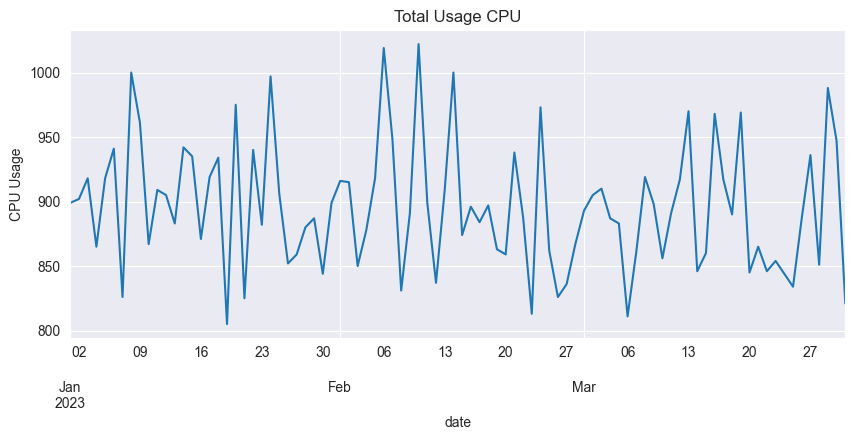

In [16]:
azure_df.groupby('date')['usage_cpu'].sum().plot(figsize = (10,4))
plt.title("Total Usage CPU")
plt.ylabel("CPU Usage")
plt.show()

Region-wise CPU usage

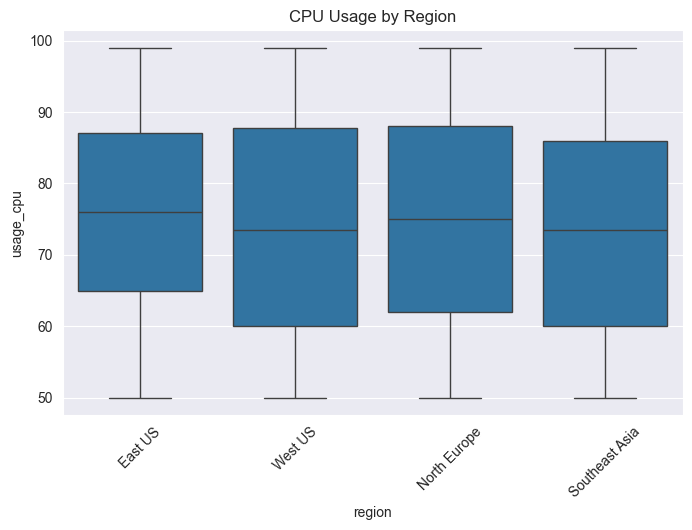

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(data=azure_df,x='region',y='usage_cpu')
plt.title("CPU Usage by Region")
plt.xticks(rotation=45)
plt.show()

correlation heatmap

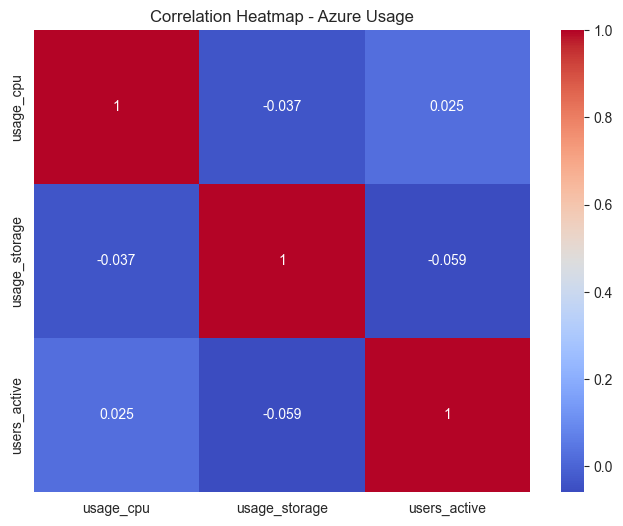

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(azure_df[['usage_cpu','usage_storage','users_active']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap - Azure Usage')
plt.show()